### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
cln_application_df= application_df.drop(["EIN","NAME"],axis=1)
cln_application_df.head()
cln_application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
# Determine the number of unique values in each column.
# Generate our categorical variable list
application_cat = cln_application_df.dtypes[cln_application_df.dtypes == "object"].index.tolist()
cln_application_df[application_cat].nunique()


APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts= cln_application_df['APPLICATION_TYPE'].value_counts()
app_type_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

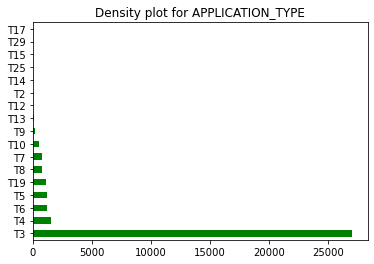

In [5]:
# Visualize the value counts of APPLICATION_TYPE
# app_type_counts.plot.density()
cln_application_df.APPLICATION_TYPE.value_counts().plot(kind="barh", color='green')
plt.title('Density plot for APPLICATION_TYPE')
plt.show()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list (app_type_counts[app_type_counts<500].index) 

# Replace in dataframe
for app in replace_application:
    cln_application_df.APPLICATION_TYPE = cln_application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
cln_application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_type_counts= cln_application_df['CLASSIFICATION'].value_counts()
class_type_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C1900        1
C6100        1
C2561        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

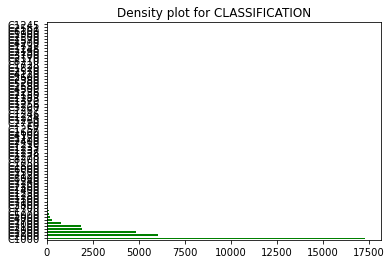

In [8]:
# Visualize the value counts of CLASSIFICATION
cln_application_df.CLASSIFICATION.value_counts().plot(kind="barh", color='green')
plt.title('Density plot for CLASSIFICATION')
plt.show()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list (class_type_counts[class_type_counts<1000].index) 

# Replace in dataframe
for cls in replace_class:
    cln_application_df.CLASSIFICATION = cln_application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
cln_application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = cln_application_df.dtypes[cln_application_df.dtypes == "object"].index.tolist()
cln_application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cln_application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
cln_application_df= cln_application_df.merge(encode_df, left_index=True, right_index=True)
cln_application_df= cln_application_df.drop(application_cat,1)
cln_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X=cln_application_df.drop(['IS_SUCCESSFUL'],1).values
y=cln_application_df["IS_SUCCESSFUL"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch",
    period=5)

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5747 - accuracy: 0.7177
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7278
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.7294
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5512 - accuracy: 0.7310
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7308
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7315
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7327
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5458 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.7393: 0s - loss: 0
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7399
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5345 - accuracy: 0.7393
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.7402
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5345 - accuracy: 0.7407
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7400
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7406
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7402
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 0.7418
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.534

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5605 - accuracy: 0.7307
Loss: 0.5604584217071533, Accuracy: 0.7307288646697998


In [19]:
# Export our model to HDF5 file
nn.save("trained_application.h5")